In [ ]:
import nltk
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [ ]:
def text_cleaner(text):
    text = re.sub(r"\n"," ",str(text))
    text = re.sub(r"\t"," ",str(text))
    text = re.sub(r"\r"," ",str(text))
    text = re.sub(r"(@)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9 -])", "", text)
    text = text.strip(" ")
    return text

In [ ]:
data =  pd.read_csv('covid19_tweets2.csv')

In [ ]:
#cm = sns.light_palette("green", as_cmap = True)
#data.head(10).style.background_gradient(cmap = cm)

In [ ]:
username = data['user_name'].value_counts().reset_index()
username = pd.DataFrame(username)
username.columns = ['Twitter UserName', 'Number of Tweets']
username_10 = username.head(10)
username_10

In [ ]:
plt.figure(figsize = (30,10))
sns.barplot(x = 'Twitter UserName', y = 'Number of Tweets', data = username_10)

In [ ]:
followers = data[['user_name', 'user_followers']].copy()
followers = followers.drop_duplicates(subset = ['user_name'])
followers = followers.sort_values(by = ['user_followers'], ascending = False)
followers_10 = followers.head(10)
followers_10

In [ ]:
plt.figure(figsize = (30,15))
sns.barplot(x = 'user_name', y = 'user_followers', data = followers_10)
plt.xlabel('User Name', fontweight = 'bold')
plt.ylabel('# of followers', fontweight = 'bold')
plt.title('Top 10 Twitter usernames by follower count')

In [27]:
tweets = data[['text', 'user_favourites']].copy()
tweets = tweets.drop_duplicates(subset = ['text'])
tweets = tweets.sort_values(by = ['user_favourites'], ascending = False)
tweets_10 = tweets.head(10)
tweets_10

,text,user_favourites
14504,So Trump wants everyone else's child to get #C...,2047197
173409,How do you pioneer a growing fatality rate and...,1320166
172861,"Interesting, since some say asymptomatic carri...",1320166
172825,"So many conflicting reports, so much we don't ...",1320166
148145,Herd immunity at 20% is still too high and wou...,1317944
148540,"Sounds like the need for a booster shot, once ...",1317944
177848,Nuovo rimbalzo del #covid19 in #Turchia Corona...,1161820
168379,Sotto i 300 casi #covid19 #SudCorea S. Korea c...,1161816
156746,Il rapporto tra casi accertati e mortalità è e...,1159748
141678,Mortalità molto elevata rispetto ai casi #covi...,1158416


Text(0.5, 1.0, 'Viral tweets')

C:\Users\Guillermo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128548 (\N{FACE WITH LOOK OF TRIUMPH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


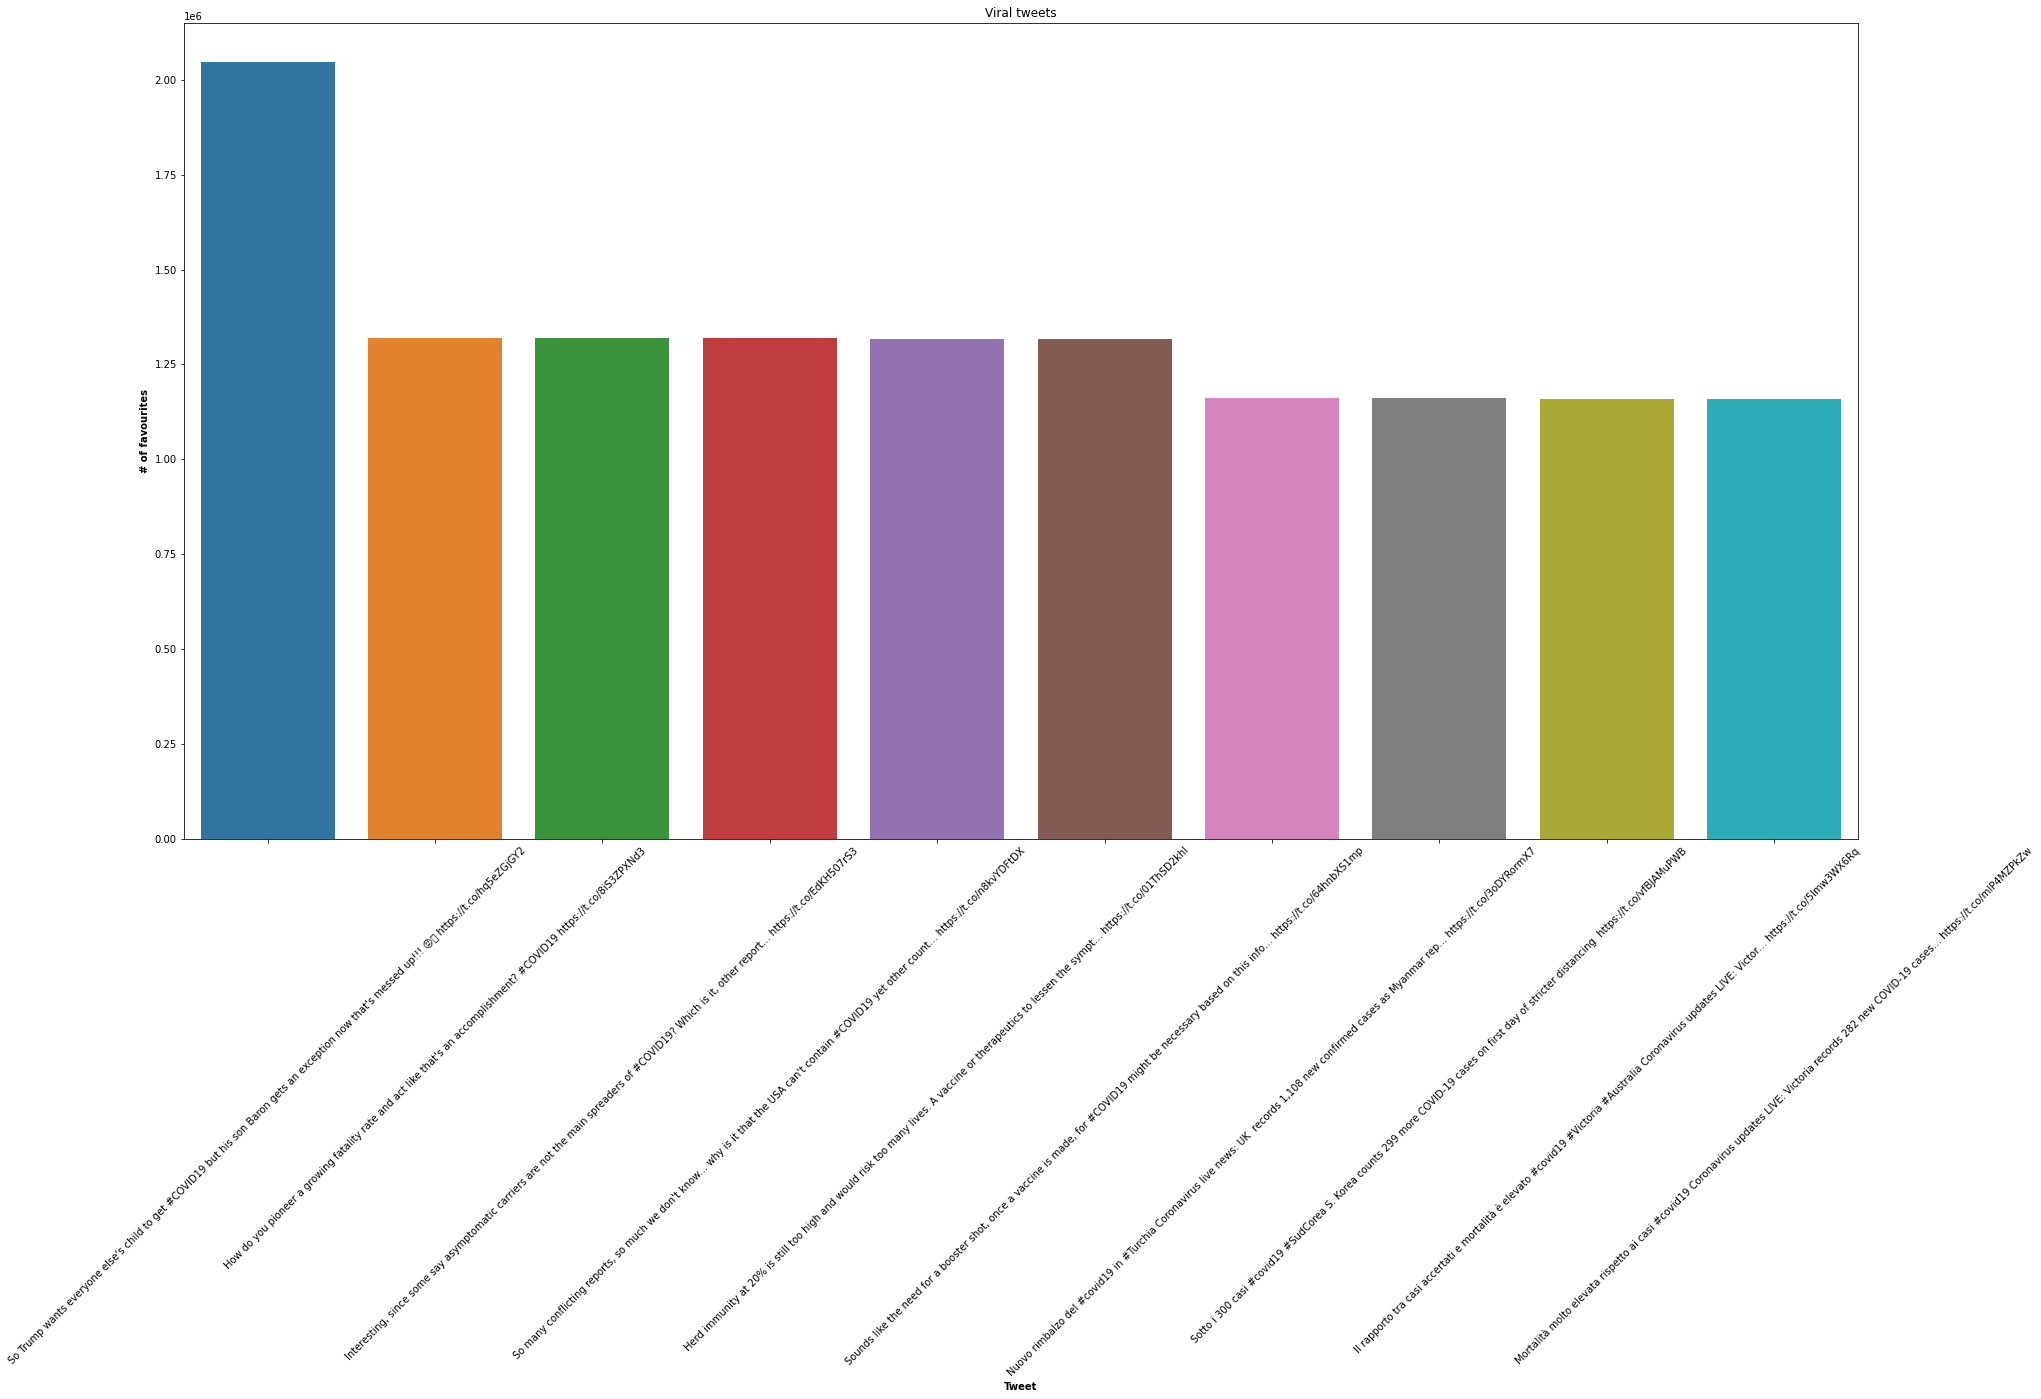

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [31]:
plt.figure(figsize = (30, 15))
sns.barplot(x = 'text', y = 'user_favourites', data = tweets_10)

plt.xlabel('Tweet', fontweight = 'bold')
plt.ylabel('# of favourites', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.title('Viral tweets')